In [1]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from itertools import product
import time
import os

In [2]:
data = np.loadtxt('EarthquakeExerciseData.txt')
scaled_data = 1 + data/max(data) # for plotting purposes
# adding 1 to the obvs value to ensure outward projection, (cos and sin values of the )

In [13]:
def value(x_true,y_true,x_sensor,y_sensor):
    return 1/(0.1+ (x_true-x_sensor)**2 + (y_true-y_sensor)**2)

# Question 1

### Building spherical coordinate system

In [3]:
S=2000 # number of points on the spiral
rate=25 # angular rate of spiral
sd=0.2 # standard deviation of the sensor Gaussian noise

# building the spherical coordinate system as done in setup file
x=np.zeros(S)
y=np.zeros(S)
for s in range(S):
    theta=rate*2*np.pi*s/S 
    r=s/S
    x[s]=r*np.cos(theta)
    y[s]=r*np.sin(theta)


### Computing station locations

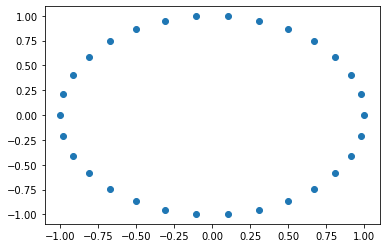

In [4]:
# getting positions of the stations    
N=len(data) # number of stations
sd=0.2 # standard deviation of the sensor noise
x_sensor = np.zeros(N)
y_sensor = np.zeros(N)
for sensor in range(N):
    theta_sensor = 2*np.pi*sensor/N
    x_sensor[sensor] = np.cos(theta_sensor)
    y_sensor[sensor] = np.sin(theta_sensor)

# plotting positions of the stations
plt.scatter(x_sensor, y_sensor)

### Building hypothesis space

In [32]:
# Building hypothesis space
# earthquakes are said to be independent, hence the value function is called independently at every station
if os.path.exists('hypothesis.csv') == False:
    print('Building the hypothesis space...')
    build = time.time()
    hypothesis = np.zeros((S,N))
    for s1,s2 in product(range(0,S), range(0,S)):
        for i in range(N):
            hypothesis[s1][i]=value(x[s1],y[s1],x_sensor[i],y_sensor[i]) + value(x[s2],y[s2],x_sensor[i],y_sensor[i])+ 0.2*np.random.randn() # explosion value
    print('Took',time.time() - build,'seconds to build hypothesis space for 2 earthquakes')
    np.savetxt('hypothesis.csv', hypothesis, delimiter=',', fmt = '%10.5f')
else:
    v = np.loadtxt('hypothesis.csv', dtype='float', delimiter=',')

### Computing/Plotting posterior distribution
Given that prior is uniform, posterior is proportional to the likelihood.

In [51]:
# Determine likelihood, p(location|observed sensor values), given these sensor values
prob=np.zeros(S)
for s in range(0,S):
    prob[s] += -0.5*np.prod(data -v[s])**2/(sd**2) # follows gaussian distribution (as shown in BRML)
like=np.exp(prob)/np.sqrt(2*np.pi*(sd**2))


[ 0.88503177  1.42187234  1.13692597  2.01576704  2.09770546  2.07231683
  2.30691382  2.05991871  1.51052918  1.64327899  1.87027637  2.33659163
  3.60545303  6.41914904  8.5080478   6.0183679   3.88077551  1.49483415
  0.84025713  0.51790348  0.45266744  0.39193515  0.25209401 -0.42934818
  0.03657711  0.30286303  0.30583035 -0.15744035  0.46519207  0.07734898] 0.7125681508495888
[ 0.52595945  1.09028395  1.62258414  1.89371862  1.7913995   2.52778586
  2.28587811  1.95401798  1.76641866  1.68373249  2.19413952  2.65472358
  3.77906143  6.72952003  8.59995572  5.64495056  3.64686223  1.94635609
  0.67203423  0.39590953  0.49521129  0.18779685  0.19852272 -0.56729329
  0.25830573  0.35681519 -0.25898758 -0.14803289  0.45357881  0.70311408] -16.99113498093118
[ 0.48690735  1.13884758  1.90792899  1.61768442  2.03492042  2.15955531
  2.61440403  1.69654552  1.84332024  1.60071996  2.04249729  2.40795936
  3.55053265  6.50821092  8.37872933  5.98862772  3.44293607  1.82644228
  0.5077191

  0.03981827  0.12398193 -0.27733788 -0.51929598 -0.01034289  0.09548822] -0.006272200440273311
[ 2.18220457e-01  9.31952785e-01  1.28285305e+00  1.47420024e+00
  1.74649858e+00  2.40398415e+00  2.36751594e+00  1.55131185e+00
  1.76815234e+00  1.79915598e+00  1.90812054e+00  2.31418571e+00
  3.52384515e+00  6.97876257e+00  8.84401515e+00  6.22186877e+00
  3.87146328e+00  1.94149531e+00  9.55911819e-01  6.12588439e-01
  8.73337595e-01  1.09712342e-01  2.75272534e-01 -3.69606859e-01
 -1.82543844e-02  2.34746457e-01 -2.95917097e-03 -5.78315524e-02
 -1.78920560e-01 -2.04906467e-03] 1.3005540791107663e-06
[ 0.46226437  0.36835391  1.05116583  1.27902672  2.09220987  2.51991825
  2.52114806  2.00951097  1.68758764  1.91938385  2.28915065  2.80029015
  3.83637028  6.92237343  8.78605511  6.41437776  3.74821693  2.22954844
  1.20414276  1.03546879  0.41165479  0.1606653   0.58223509 -0.28643422
  0.23175702 -0.07598117  0.29263107 -0.08419408  0.13515127 -0.02994925] 0.038352944133170044
[ 0.0

  2.03201505e-01  1.66803123e-01] 2.5538845790192326e-06
[-1.26832061e-01  1.37518845e-01  8.88238024e-01  1.08922759e+00
  1.31491907e+00  8.21188569e-01  1.48840834e+00  8.44292985e-01
  1.10565546e+00  1.43015711e+00  1.97888532e+00  2.45844810e+00
  3.93192577e+00  6.66505729e+00  8.79115840e+00  6.30430684e+00
  3.83361038e+00  2.23662661e+00  1.03215508e+00  6.15974934e-01
  1.07715885e+00  2.55652359e-01  8.09028322e-01 -1.81153643e-01
  1.08508139e-01  3.63070772e-01  1.45335328e-01  1.48102349e-01
 -1.95223024e-01 -7.82992026e-03] 7.296242497438192e-05
[-2.25458799e-01  9.17551226e-01  8.05802447e-01  5.67153126e-01
  1.11348127e+00  1.38322917e+00  1.81535228e+00  1.31307958e+00
  1.10809148e+00  1.51755039e+00  1.59582099e+00  2.46414607e+00
  3.88029469e+00  6.81591891e+00  8.68962510e+00  6.35051369e+00
  3.92831269e+00  2.12018506e+00  1.31691717e+00  1.02600571e+00
  8.42237865e-01 -1.44396686e-01  4.83090555e-01  1.36168777e-02
  1.81168310e-01  1.53191249e-01  1.210725

[ 0.88503338  1.05585558  1.39734653  1.4739116   1.59414834  1.41030573
  0.49037621 -0.45940183 -0.27900359 -0.00985227  0.78880809  1.5894865
  3.39505216  6.04417111  8.79788625  6.21522307  4.25962101  2.63570826
  1.14949254  0.6703183   1.02721939  0.25591656  0.71057951  0.09918364
  0.54673841  0.71552651  0.67197942  0.21556923  0.7399098   0.72476064] -0.018360642516044738
[ 1.13477071  1.26079934  1.55769705  1.42473718  1.33090566  1.38979759
  0.80388451 -0.02991255 -0.82565712 -0.45755821  0.41396951  1.32919475
  3.18687067  6.37391846  8.72307368  6.33590708  3.92527043  2.13867518
  1.35604229  0.85982701  1.08125382  0.32525874  1.02827453 -0.09929163
  0.98178956  0.72857826  0.53645014  0.63759107  0.46150153  0.94554464] 1.2367117757917512
[ 0.93478449  1.24842478  1.61122503  1.5298664   1.95314904  1.61421285
  1.0113216   0.44672065 -0.29911544 -0.31836209  0.26225007  0.97483005
  3.23491292  6.17339826  8.79893159  6.01934483  3.66612939  2.31702543
  1.04718

 -3.19777458 -1.94815588 -1.11705997 -0.28290317  0.19399481  0.73160141] 7303687.013292356
[ 0.91293182  1.26017738  2.03163071  2.57229371  2.83161231  3.13931528
  2.94838076  2.48899584  2.11937182  2.37968321  2.26586146  2.88051569
  4.2628904   7.35356811  8.79883721  6.93899748  3.88721242  1.91767169
  0.61600083 -0.15495794 -0.23670497 -1.9355678  -3.28025356 -4.79696638
 -3.85966546 -2.37283104 -1.91223484 -0.31310026 -0.0588468   0.37991472] 15538660.93587284
[ 0.67199689  1.41899473  1.93312924  2.0076053   2.58025908  2.86484923
  2.8206527   2.23663707  1.80810008  2.1534961   2.94615446  2.70539734
  3.91228415  6.7364532   8.87383972  6.62032431  3.91925649  2.30896241
  0.81893583  0.41188403  0.16925528 -1.73347647 -2.91921786 -4.49619535
 -4.30382172 -3.43194178 -2.00291652 -0.82763415 -0.63576759  0.55183669] 837384245.8488553
[ 7.73413984e-01  1.30409915e+00  2.07433324e+00  2.23992559e+00
  2.80964474e+00  3.05313008e+00  3.11853869e+00  2.35198684e+00
  2.127020

  0.83316067  0.60515179  0.58248244  0.42416001  0.89232367  1.23897897] 139.6704758617232
[ 1.45816491  1.76357189  2.47217054  2.32238309  2.8634212   2.66249695
  3.06091723  2.6151917   2.16512611  1.94822606  1.85059362  2.10025448
  2.9414766   4.64188239  4.32608187 -1.33774855 -3.50739218 -2.01132611
 -0.7056662  -0.16621934  0.5420766  -0.12811493  0.61173978  0.21274143
  0.71186561  0.31729237  1.08035676  0.4218337   0.81847476  0.64819485] 476.73793465022464
[ 1.22923298e+00  1.58143787e+00  2.39591629e+00  2.24745054e+00
  2.59842032e+00  2.98606540e+00  2.96097233e+00  2.46320794e+00
  2.22239781e+00  2.02284762e+00  2.59416306e+00  1.87907316e+00
  2.61234156e+00  4.78619030e+00  5.30302084e+00 -4.02185657e-01
 -4.69657989e+00 -3.60260646e+00 -1.47493724e+00 -6.63267713e-02
 -3.19393644e-03 -2.56767999e-02  4.80035654e-01  4.15380539e-01
  6.61458572e-01  7.51775100e-01  4.36269083e-01  6.09310953e-01
  5.78317724e-01  6.45999773e-01] -0.4627204022155483
[ 1.54139714  

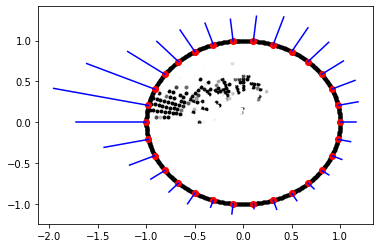

In [30]:
plt.figure()
# plotting posterior
for s in range(0,S):
    plt.plot(x[s],y[s],".",color=(1-(like[s]/max(like)))*np.array([1,1,1]))


# plottling perimeter
for theta in np.arange(0,2*np.pi,0.01):
    plt.plot(np.cos(theta),np.sin(theta),".",color=[0,0,0])

# plotting station locations
for sensor in range(0, N):
    plt.plot(x_sensor[sensor],y_sensor[sensor],"o",color=[1,0,0])

# plotting observed values at each sensor (spikes shown in fig (1.3))
for sensor in range(N):
    scale =1
    theta_sensor = 2*np.pi*sensor/N
    base = [x_sensor[sensor],((scaled_data[sensor])*np.cos(theta_sensor))] 
    top = [y_sensor[sensor], ((scaled_data[sensor])*np.sin(theta_sensor))]
    plt.plot(base, top,"-",color='b')


plt.show()

# Question 2

### Building hypotheses

In [35]:
# Building hypothesis space for 1 explosion
# earthquakes are said to be independent, hence the value function is called independently at every station
build = time.time()
v_explosion1 = np.zeros((S,N))
for s1 in range(0,S):
    for i in range(N):
        v[s1][i] = value(x[s1],y[s1],x_sensor[i],y_sensor[i]) + sd*np.random.randn() # explosion value
print('Took',time.time() - build,'seconds to build hypothesis space for 1 earthquake')

# Building hypothesis space for 2 explosions - done in question 1
v_explosion2 = np.loadtxt('hypothesis.csv', dtype='float', delimiter=',')

Took 0.22591710090637207 seconds to build hypothesis space for 1 earthquake


### Computing likelihood for both situations

In [48]:
# for 1 explosion
prob1=np.zeros(S)
for s in range(0,S):
    prob1[s] += -0.5*np.prod(data -v_explosion1[s])**2/(sd**2) # follows gaussian distribution (as shown in BRML)
like1=np.exp(prob1)/np.sqrt(2*np.pi*(sd**2))

# for 2 explosions
prob2=np.zeros(S)
for s in range(0,S):
    prob2[s] += -0.5*np.prod(data -v_explosion2[s])**2/(sd**2) # follows gaussian distribution (as shown in BRML)
like2=np.exp(prob2)/np.sqrt(2*np.pi*(sd**2))

### Computing log-likelihoods

In [45]:
print(np.log(like2) - np.log(like1))

[           -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf -2.14538870e+01            -inf
            -inf         

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


# Question 3

# Question 4
Intuition: the computational complexity of the loglikelihood calculations is of S^n, where n is the # of explosions and S is the amount of points we are modelling